In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [2]:
# load all the training samples
data = []
with open('snli_1.0/snli_1.0_train.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        data.append([row[0],row[1],row[2],row[3],row[4]])

In [3]:
data = np.array(data)

In [4]:
data[1][0],data[1][1]

('neutral', '0.717690')

In [5]:
neutral = []
entailment = []
contradiction = []
for d in data[1:,:]:
    if d[0] == 'neutral':
        neutral.append(d[1:])
    elif d[0] == 'entailment':
        entailment.append(d[1:])
    else:
        contradiction.append(d[1:])
len(neutral),len(entailment),len(contradiction)
neutral = np.array(neutral)
entailment = np.array(entailment)
contradiction = np.array(contradiction)

In [6]:
# prepare labels as strings
lbls_str = data[1:,0]
# prepare same labels as ints
lbls_int = []
for d in data[1:,0]:
    if d == 'neutral':
        lbls_int.append(0)
    elif d == 'entailment':
        lbls_int.append(1)
    else:
        lbls_int.append(2)  # contradiction
len(lbls_int), len(lbls_str)

(549367, 549367)

# Bleu score

For each category

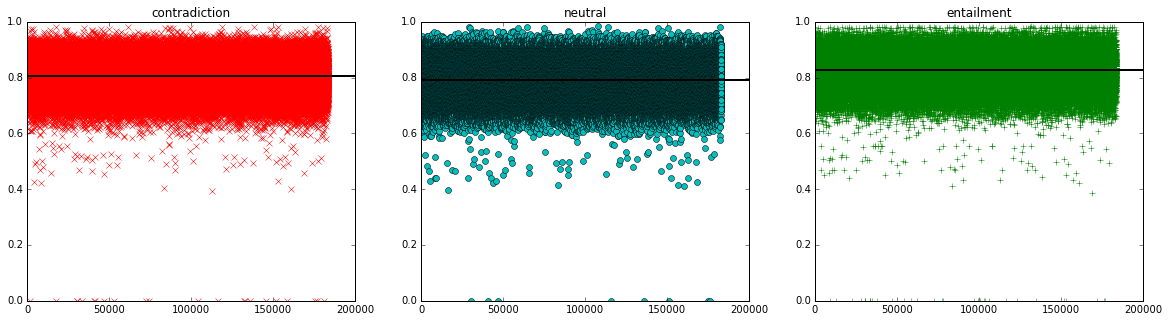

In [7]:
xn = np.array([x for x in range(len(neutral))])
xe = np.array([x for x in range(len(entailment))])
xc = np.array([x for x in range(len(contradiction))])
fig, ax = plt.subplots(figsize=(20,5))
plt.subplot(131)
plt.title('contradiction')
plt.plot(xc,contradiction[:,0],'rx')
plt.axhline(linewidth=2, color='k', y=np.mean(contradiction[:,0].astype('float')))
plt.subplot(132)
plt.title('neutral')
plt.plot(xn,neutral[:,0],'co')
plt.axhline(linewidth=2, color='k', y=np.mean(neutral[:,0].astype('float')))
plt.subplot(133)
plt.title('entailment')
plt.plot(xe,entailment[:,0],'g+')
plt.axhline(linewidth=2, color='k', y=np.mean(entailment[:,0].astype('float')))

# Similarity Score
For every class

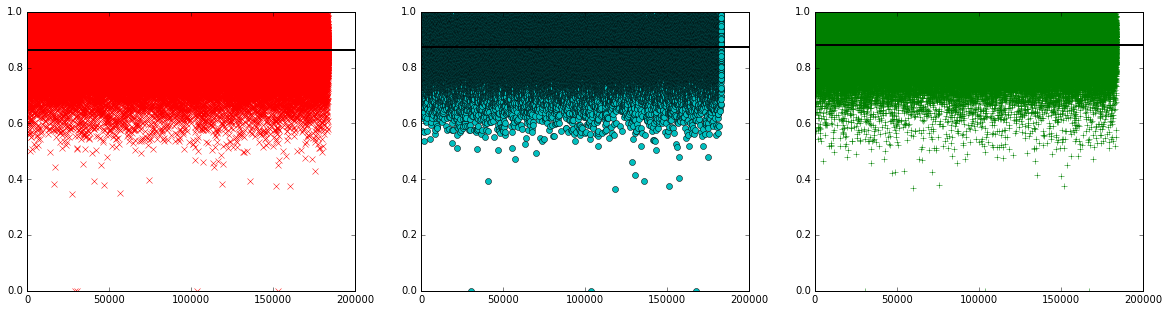

In [8]:
#x = np.array([x for x in range(len(neutral))])
fig, ax = plt.subplots(figsize=(20,5))
plt.subplot(131)
plt.plot(xc,contradiction[:,1],'rx')
plt.axhline(linewidth=2, color='k', y=np.mean(contradiction[:,1].astype('float')))
plt.subplot(132)
plt.plot(xn,neutral[:,1],'co')
plt.axhline(linewidth=2, color='k', y=np.mean(neutral[:,1].astype('float')))
plt.subplot(133)
plt.plot(xe,entailment[:,1],'g+')
plt.axhline(linewidth=2, color='k', y=np.mean(entailment[:,1].astype('float')))

# Earth movers distance
Ffor each class

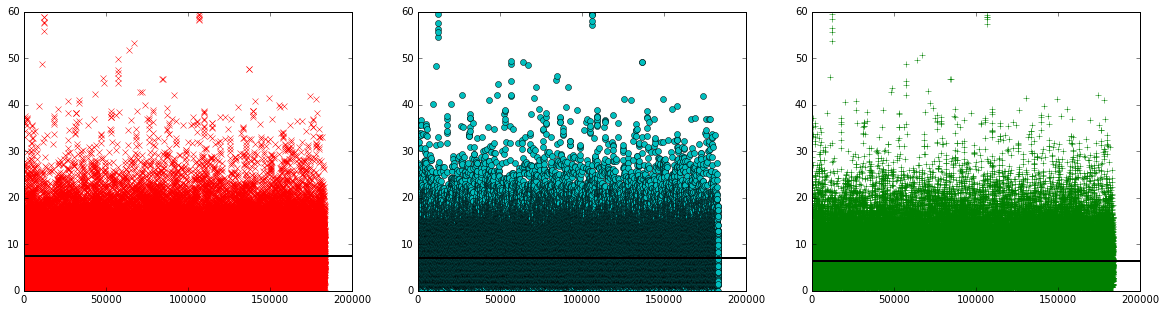

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
plt.subplot(131)
plt.plot(xc,contradiction[:,2],'rx')
plt.axhline(linewidth=2, color='k', y=np.mean(contradiction[:,2].astype('float')))
plt.subplot(132)
plt.plot(xn,neutral[:,2],'co')
plt.axhline(linewidth=2, color='k', y=np.mean(neutral[:,2].astype('float')))
plt.subplot(133)
plt.plot(xe,entailment[:,2],'g+')
plt.axhline(linewidth=2, color='k', y=np.mean(entailment[:,2].astype('float')))

## EMD, closer look at 50 samples

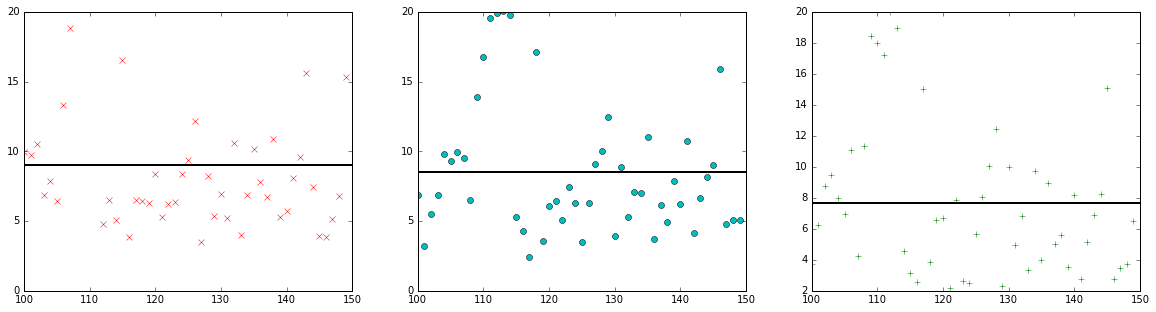

In [160]:
fig, ax = plt.subplots(figsize=(20,5))
plt.subplot(131)
axes = plt.gca()
axes.set_ylim([0,20])
plt.plot(xc[100:150],contradiction[100:150,2],'rx')
plt.axhline(linewidth=2, color='k', y=np.mean(contradiction[100:150,2].astype('float')))
plt.subplot(132)
axes = plt.gca()
axes.set_ylim([0,20])
plt.plot(xn[100:150],neutral[100:150,2],'co')
plt.axhline(linewidth=2, color='k', y=np.mean(neutral[100:150,2].astype('float')))
plt.subplot(133)
plt.plot(xe[100:150],entailment[100:150,2],'g+')
plt.axhline(linewidth=2, color='k', y=np.mean(entailment[100:150,2].astype('float')))

# Cross-unigrams ratio
For every class

cross unigrams


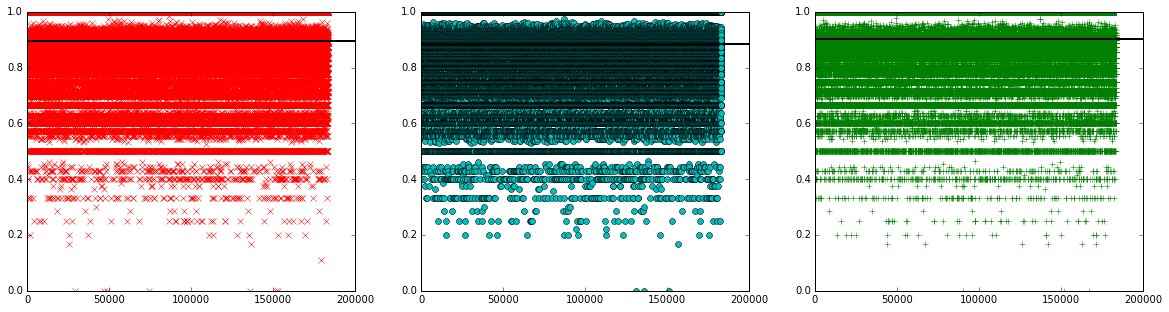

In [11]:
#x = np.array([x for x in range(len(neutral))])
fig, ax = plt.subplots(figsize=(20,5))
print('cross unigrams')
plt.subplot(131)
plt.plot(xc,contradiction[:,3],'rx')
plt.axhline(linewidth=2, color='k', y=np.mean(contradiction[:,3].astype('float')))
plt.subplot(132)
plt.plot(xn,neutral[:,3],'co')
plt.axhline(linewidth=2, color='k', y=np.mean(neutral[:,3].astype('float')))
plt.subplot(133)
plt.plot(xe,entailment[:,3],'g+')
plt.axhline(linewidth=2, color='k', y=np.mean(entailment[:,3].astype('float')))

## Cross-unigrams again, closer look at 100 samples

cross unigrams


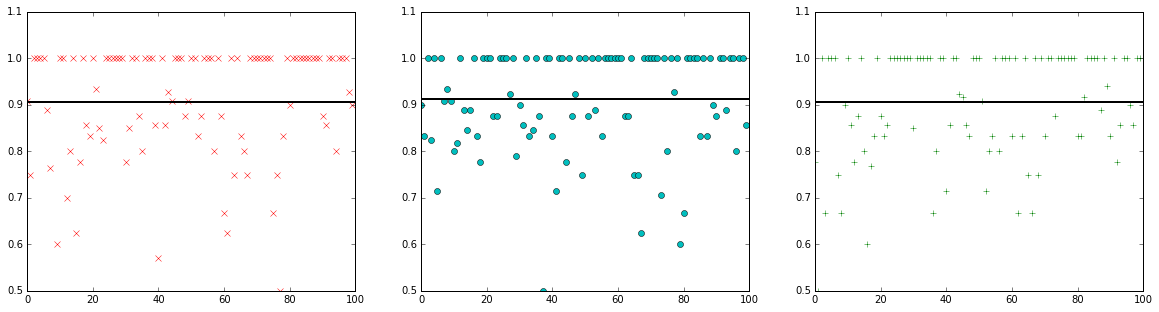

In [161]:
fig, ax = plt.subplots(figsize=(20,5))
print('cross unigrams')
plt.subplot(131)
axes = plt.gca()
axes.set_ylim([0.5,1.1])
plt.plot(xc[:100],contradiction[:100,3],'rx')
plt.axhline(linewidth=2, color='k', y=np.mean(contradiction[:100,3].astype('float')))
plt.subplot(132)
plt.plot(xn[:100],neutral[:100,3],'co')
plt.axhline(linewidth=2, color='k', y=np.mean(neutral[:100,3].astype('float')))
plt.subplot(133)
plt.plot(xe[:100],entailment[:100,3],'g+')
plt.axhline(linewidth=2, color='k', y=np.mean(entailment[:100,3].astype('float')))

In [13]:
data[1:3,1:3], data[1:5,0]

(array([['0.717690', '0.889501'],
        ['0.746842', '0.901321']], 
       dtype='|S13'),
 array(['neutral', 'contradiction', 'entailment', 'neutral'], 
       dtype='|S13'))

# Train models on large dataset

In [124]:
trStart = 50000
trLimit = 50100

### SVM

In [126]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(data[trStart:trLimit,1:].astype('float'), data[trStart:trLimit,0])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### KNeighborsClassifier

In [127]:
from sklearn.neighbors import KNeighborsClassifier
kneigh = KNeighborsClassifier(n_neighbors=3)
kneigh.fit(data[trStart:trLimit,1:].astype('float'), data[trStart:trLimit,0])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### DecisionTreeRegressor
Needs labels as ints

In [128]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(data[trStart:trLimit,1:].astype('float'), lbls_int[trStart:trLimit])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

### Decission Tree Classifier
Needs labels as ints

In [129]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(data[trStart:trLimit,1:].astype('float'), lbls_int[trStart:trLimit])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

### Multinomial Naive Bayes
Needs labels as ints

In [130]:
from sklearn.naive_bayes import MultinomialNB
multin_naive_clf = MultinomialNB()
multin_naive_clf.fit(data[trStart:trLimit,1:].astype('float'), lbls_int[trStart:trLimit])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Gaussian Naive Bayes 
Needs labels as ints

In [131]:
from sklearn.naive_bayes import GaussianNB
gaussianNB_clf = GaussianNB()
gaussianNB_clf.fit(data[trStart:trLimit,1:].astype('float'), lbls_int[trStart:trLimit])

GaussianNB()

## Testing on training data

In [132]:
numberOfTestingSamples = 100
tstStart = trLimit
tstLimit = trLimit + numberOfTestingSamples

In [133]:
pred = svm_model.predict(data[tstStart:tstLimit,1:].astype('float'))
lbl = lbls_str[tstStart:tstLimit]
ok = 0.
err = 0.
for i in range(len(pred)):
    if pred[i] == lbl[i]:
        ok += 1.
    else:
        err += 1.
print 'match',ok,'error',err,'rate',ok / (ok+err)

match 38.0 error 62.0 rate 0.38


In [134]:
pred = kneigh.predict(data[tstStart:tstLimit,1:].astype('float'))
lbl = lbls_str[tstStart:tstLimit]
ok = 0.
err = 0.
for i in range(len(pred)):
    if pred[i] == lbl[i]:
        ok += 1.
    else:
        err += 1.
print 'match',ok,'error',err,'rate',ok / (ok+err)

match 29.0 error 71.0 rate 0.29


In [135]:
pred = dt_regressor.predict(data[tstStart:tstLimit,1:].astype('float'))
lbl = lbls_int[tstStart:tstLimit]
ok = 0.
err = 0.
for i in range(len(pred)):
    if pred[i] == lbl[i]:
        ok += 1.
    else:
        err += 1.
print 'match',ok,'error',err,'rate',ok / (ok+err)

match 30.0 error 70.0 rate 0.3


In [136]:
pred = dt_clf.predict(data[tstStart:tstLimit,1:].astype('float'))
lbl = lbls_int[tstStart:tstLimit]
ok = 0.
err = 0.
for i in range(len(pred)):
    if pred[i] == lbl[i]:
        ok += 1.
    else:
        err += 1.
print 'match',ok,'error',err,'rate',ok / (ok+err)

match 32.0 error 68.0 rate 0.32


In [137]:
pred = multin_naive_clf.predict(data[tstStart:tstLimit,1:].astype('float'))
lbl = lbls_int[tstStart:tstLimit]
ok = 0.
err = 0.
for i in range(len(pred)):
    if pred[i] == lbl[i]:
        ok += 1.
    else:
        err += 1.
print 'match',ok,'error',err,'rate',ok / (ok+err)

match 39.0 error 61.0 rate 0.39


In [138]:
pred = gaussianNB_clf.predict(data[tstStart:tstLimit,1:].astype('float'))
lbl = lbls_int[tstStart:tstLimit]
ok = 0.
err = 0.
for i in range(len(pred)):
    if pred[i] == lbl[i]:
        ok += 1.
    else:
        err += 1.
print 'match',ok,'error',err,'rate',ok / (ok+err)

match 33.0 error 67.0 rate 0.33


# Now perform testing on dev dataset

In [139]:
# load test samples
test_data = []
with open('snli_1.0/snli_1.0_dev.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        test_data.append([row[0],row[1],row[2],row[3],row[4]])
test_data = np.array(test_data)
# extract test labels
tst_lbls_str = test_data[1:,0]
tst_lbls_int = []
for d in test_data[1:,0]:
    if d == 'neutral':
        tst_lbls_int.append(0)
    elif d == 'entailment':
        tst_lbls_int.append(1)
    else:
        tst_lbls_int.append(2)  # contradiction
len(tst_lbls_int), len(tst_lbls_str)

(9842, 9842)

In [140]:
len(test_data[1:,:])

9842

In [148]:
numberOfTestingSamples = 90
tstStart = 4000
tstLimit = tstStart + numberOfTestingSamples

In [149]:
pred = svm_model.predict(test_data[tstStart:tstLimit,1:].astype('float'))
lbl = tst_lbls_str[tstStart:tstLimit]
ok = 0.
err = 0.
for i in range(len(pred)):
    if pred[i] == lbl[i]:
        ok += 1.
    else:
        err += 1.
print 'match',ok,'error',err,'rate',ok / (ok+err)

match 32.0 error 58.0 rate 0.355555555556


In [150]:
pred = kneigh.predict(test_data[tstStart:tstLimit,1:].astype('float'))
lbl = tst_lbls_str[tstStart:tstLimit]
ok = 0.
err = 0.
for i in range(len(pred)):
    if pred[i] == lbl[i]:
        ok += 1.
    else:
        err += 1.
print 'match',ok,'error',err,'rate',ok / (ok+err)

match 25.0 error 65.0 rate 0.277777777778


In [151]:
pred = dt_regressor.predict(test_data[tstStart:tstLimit,1:].astype('float'))
lbl = tst_lbls_int[tstStart:tstLimit]
ok = 0.
err = 0.
for i in range(len(pred)):
    if pred[i] == lbl[i]:
        ok += 1.
    else:
        err += 1.
print 'match',ok,'error',err,'rate',ok / (ok+err)

match 30.0 error 60.0 rate 0.333333333333


In [152]:
pred = dt_clf.predict(test_data[tstStart:tstLimit,1:].astype('float'))
lbl = tst_lbls_int[tstStart:tstLimit]
ok = 0.
err = 0.
for i in range(len(pred)):
    if pred[i] == lbl[i]:
        ok += 1.
    else:
        err += 1.
print 'match',ok,'error',err,'rate',ok / (ok+err)

match 31.0 error 59.0 rate 0.344444444444


In [153]:
pred = multin_naive_clf.predict(test_data[tstStart:tstLimit,1:].astype('float'))
lbl = tst_lbls_int[tstStart:tstLimit]
ok = 0.
err = 0.
for i in range(len(pred)):
    if pred[i] == lbl[i]:
        ok += 1.
    else:
        err += 1.
print 'match',ok,'error',err,'rate',ok / (ok+err)

match 31.0 error 59.0 rate 0.344444444444


In [154]:
pred = gaussianNB_clf.predict(test_data[tstStart:tstLimit,1:].astype('float'))
lbl = tst_lbls_int[tstStart:tstLimit]
ok = 0.
err = 0.
for i in range(len(pred)):
    if pred[i] == lbl[i]:
        ok += 1.
    else:
        err += 1.
print 'match',ok,'error',err,'rate',ok / (ok+err)

match 20.0 error 70.0 rate 0.222222222222
